# Heart Disease Diagnostic Analysis 

Cardiovascular diseases (CVDs) or heart disease are the number one cause of death globally with 17.9 million death cases each year. CVDs are concertedly contributed by hypertension, diabetes, overweight and unhealthy lifestyles.

### Attribute Information:

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type (4 values)
        0: Typical angina: chest pain related decrease blood supply to the heart,
        1: Atypical angina: chest pain not related to heart,
        2: Non-anginal pain: typically esophageal spasms (non heart related),
        3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure
* chol - serum cholestoral in mg/dl
* fbs - fasting blood sugar > 120 mg/dl,(1 = true; 0 = false),'>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results (values 0,1,2)
* thalach - maximum heart rate achieved
* exang - exercise induced angina(1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest,looks at stress of heart during excercise,unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
          0: Upsloping: better heart rate with excercise (uncommon),
          1: Flatsloping: minimal change (typical healthy heart),
          2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
* thal - thalium stress result 
          0 = normal; 1 = fixed defect; 2 = reversable defect,no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [10]:
#importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [11]:
heart=pd.read_csv("C:/Users/Sreya Raj/Downloads/Heart Disease data.csv")

In [12]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
heart.shape

(1025, 14)

In [6]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
heart.index

RangeIndex(start=0, stop=1025, step=1)

There are 14 features in the heart attack dataset and it contain records of 1025 people.

In [13]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Cleaning

In [9]:
#checking null values
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no null values in the data

In [10]:
heart.duplicated().sum()

723

There are 723 duplicated values in the heart data

In [11]:
#removing duplicates
heart=heart.drop_duplicates(keep='first')

In [12]:
heart.shape

(302, 14)

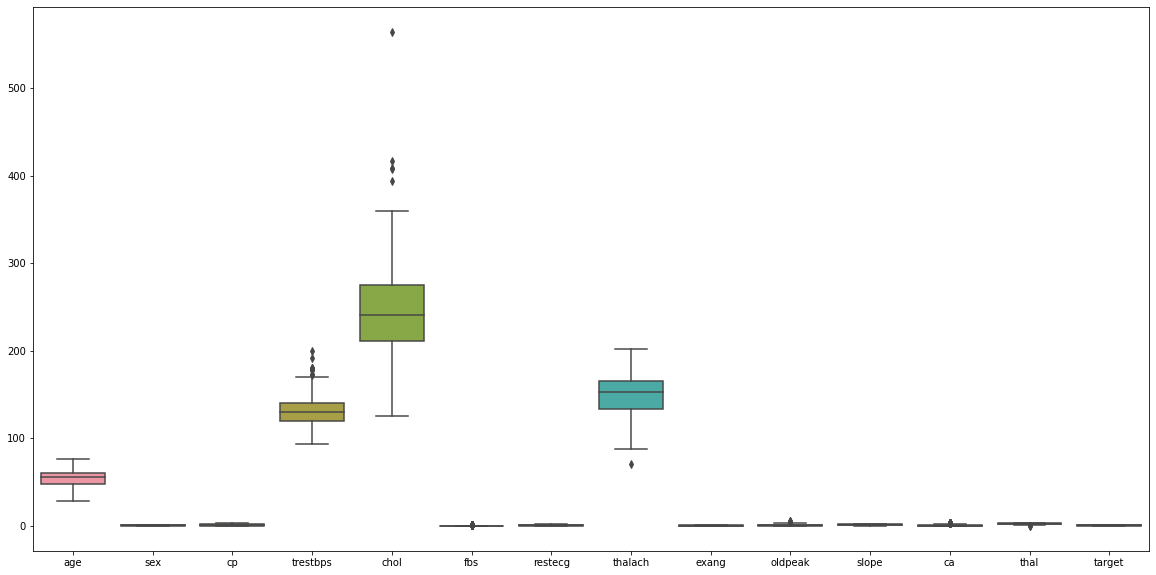

In [13]:
#checking outliers
plt.figure(figsize = (20,10))
sns.boxplot(data = heart)
plt.show()

There are outliers in columns like trestbps,chol,thalach,oldpeak,ca and thal

In [14]:
# define continuous variable & plot
continous_features = ['trestbps','chol','thalach','oldpeak','ca','thal']  
def outliers(heart_out, drop = False):
    for each_feature in heart_out.columns:
        feature_data = heart_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            heart.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(heart[continous_features])

For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5
For the feature ca, No of Outliers is 24
For the feature thal, No of Outliers is 2


In [15]:
outliers(heart[continous_features],drop=True)

Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed
Outliers from ca feature removed
Outliers from thal feature removed


In [16]:
heart.shape

(261, 14)

In [17]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,53.777778,0.685824,1.000000,129.478927,242.022989,0.126437,0.532567,150.992337,0.314176,0.955556,1.432950,0.509579,2.298851,0.578544
std,9.044571,0.465079,1.037749,15.448567,44.402957,0.332979,0.515055,22.562220,0.465079,1.038609,0.607886,0.721180,0.577427,0.494741
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,209.000000,0.000000,0.000000,138.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,155.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.000000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,2.000000,3.000000,1.000000


* The average resting blood pressure of an individual is 129 whereas the maximun value goes upto 170.
* The maximum heart rate received varies from 88 to 202 and average heart rate is 150.
* Age of the group varies from 29 to 77 and the mean age is 53
* The highest cholestrol level is 360 and the lowest is 242.
* restecg can be 3 type.
* Resting Blood Pressure of individuals vary between 94 to 200.
* There are 4 types of chest pain.
* exercise induced angina has 2 types (1 = yes; 0 = no)
* ST depression values will be more for unhealthy people and it ranges from 0 to 4 and average stress level is 0.9
* slope can be of 3 types
* No of major vessels can be 0-3
* Thalium stress can be 3 types

## EDA

### Univariate Analysis

#### Heart Attack Frequency

In [18]:
heart["target"].value_counts()

1    151
0    110
Name: target, dtype: int64

151 people has heart attack and 110 has no heart attack out of 261 patients.

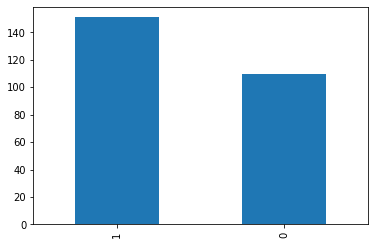

In [19]:
heart["target"].value_counts().plot(kind="bar");

#### Heart Attack Frequency based on Sex

In [20]:
heart["sex"].value_counts()

1    179
0     82
Name: sex, dtype: int64

Out of 261 people,179 are male and 82 are female

#### Frequency based on Type of  Chest Pain

In [21]:
heart["cp"].value_counts()

0    118
2     74
1     47
3     22
Name: cp, dtype: int64

<AxesSubplot:xlabel='cp', ylabel='count'>

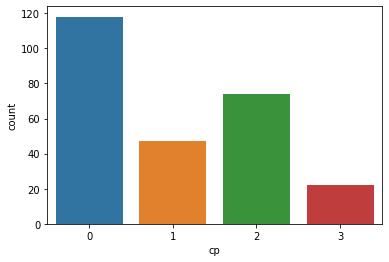

In [22]:
ax=plt.axis()
sns.countplot(x='cp', data=heart)

cp : Chest Pain type chest pain type
    
     0: typical angina
     1: atypical angina
     2: non-anginal pain
     3: asymptomatic


People with typical agina chest pain are the most, whereas of count of people with asymtomatic chest pain is lowest

#### Frequency of People based on restecg

In [23]:
heart['restecg'].value_counts()

1    135
0    124
2      2
Name: restecg, dtype: int64

<AxesSubplot:xlabel='restecg', ylabel='count'>

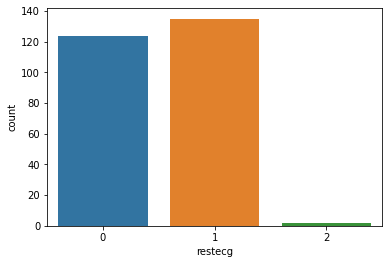

In [24]:
sns.countplot(x='restecg', data=heart)

People which non-normal heart beat are more in number and no of people with definite left ventricular hypertrophy is negligible in comparision to others.

#### Frequency of people based on Fbs

In [25]:
heart['fbs'].value_counts()

0    228
1     33
Name: fbs, dtype: int64

Among 261 people 228 are non-diabetic and 33 are diabetic

#### Frequency of people based on Thal

In [26]:
heart['thal'].value_counts()

2    151
3     94
1     16
Name: thal, dtype: int64

<AxesSubplot:xlabel='thal', ylabel='count'>

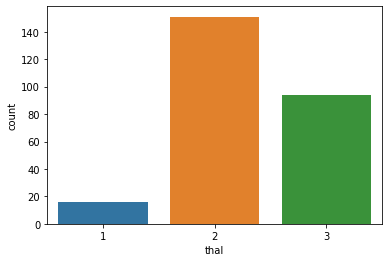

In [27]:
sns.countplot(x='thal',data=heart)

More number of people have thallium stress level as reversable defect

#### Frequency based on Exang

In [28]:
heart['exang'].value_counts()

0    179
1     82
Name: exang, dtype: int64

<AxesSubplot:xlabel='exang', ylabel='count'>

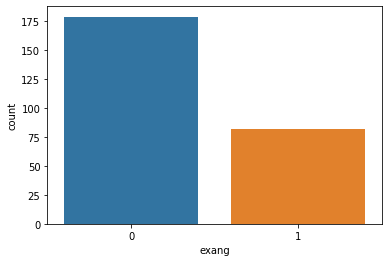

In [29]:
sns.countplot(x='exang',data=heart)

In [ ]:
Most people has no exercise induced angina.

#### Frequency based on Slope

In [30]:
heart['slope'].value_counts()

2    129
1    116
0     16
Name: slope, dtype: int64

<AxesSubplot:xlabel='slope', ylabel='count'>

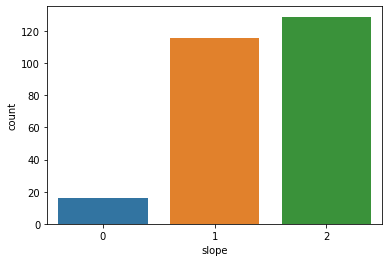

In [31]:
sns.countplot(x='slope',data=heart)

Most of the people are Downslopins which shows signs of unhealthy heart

#### Frequency based on Caa

In [32]:
heart['ca'].value_counts()

0    163
1     63
2     35
Name: ca, dtype: int64

<AxesSubplot:xlabel='ca', ylabel='count'>

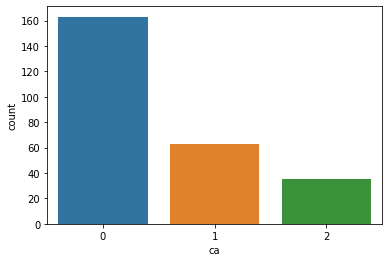

In [33]:
sns.countplot(x='ca',data=heart)

In [ ]:
The no of major vessels is 0 for most of the people.

C:\Users\Sreya Raj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


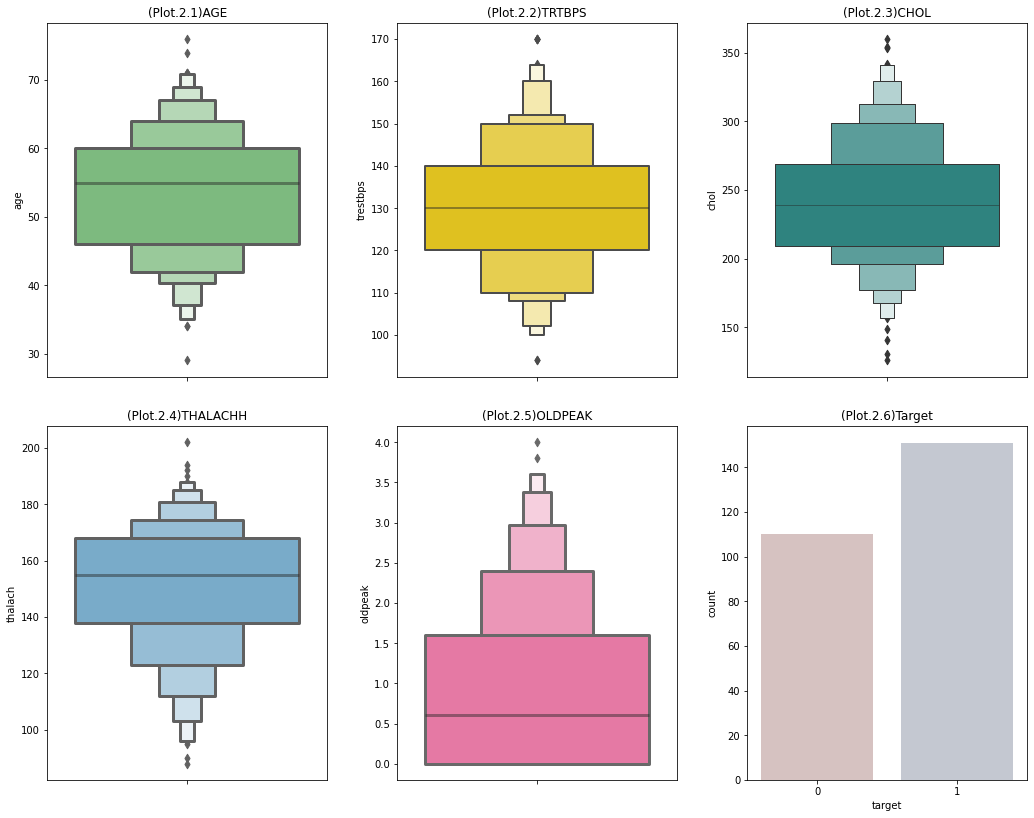

In [34]:
fig, axes = plt.subplots(2,3, figsize=(15,12))

#use the axis for plotting
axes[0, 0].set_title('(Plot.2.1)AGE')
sns.boxenplot(y=heart.age,
            palette='Greens', 
            color='red',
           linewidth=3,
           ax=axes[0,0]);


#use the axis for plotting
axes[0,1].set_title('(Plot.2.2)TRTBPS')
sns.boxenplot(y=heart.trestbps,
            palette='prism', 
            color='red',
           linewidth=2,
           ax=axes[0,1]);


#use the axis for plotting
axes[0, 2].set_title('(Plot.2.3)CHOL')
sns.boxenplot(y=heart.chol,
            palette='viridis',
           linewidth=1,
           ax=axes[0,2]);


#use the axis for plotting
axes[1, 0].set_title('(Plot.2.4)THALACHH')
sns.boxenplot(y=heart.thalach,
            palette='Blues_r', 
            color='red',
           linewidth=3,
           ax=axes[1,0]);


#use the axis for plotting
axes[1, 1].set_title('(Plot.2.5)OLDPEAK')
sns.boxenplot(y=heart.oldpeak,
            palette='RdPu', 
            color='red',
           linewidth=3,
           ax=axes[1,1]);


#use the axis for plotting
axes[1, 2].set_title('(Plot.2.6)Target')
sns.countplot(heart.target,
             palette = 'vlag_r',
             saturation=0.50,
             ax=axes[1,2]);

plt.tight_layout(pad=3);


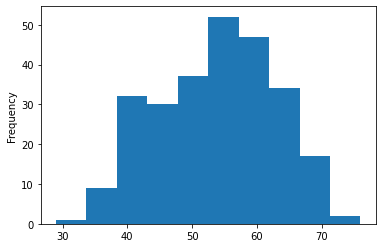

In [35]:
# check for distribution (spread)
heart["age"].plot.hist();

Most patient are between the age (45-60)

Most patient have their resting blood pressure between (120-140).Above 140 typically cause for concern

Most patient have their cholestrol level between (220-270),above 200 is cause for concern

Most patient have their heart rate between (138-170)


### Bivariate Analysis

#### Age Distribution according to Target variable

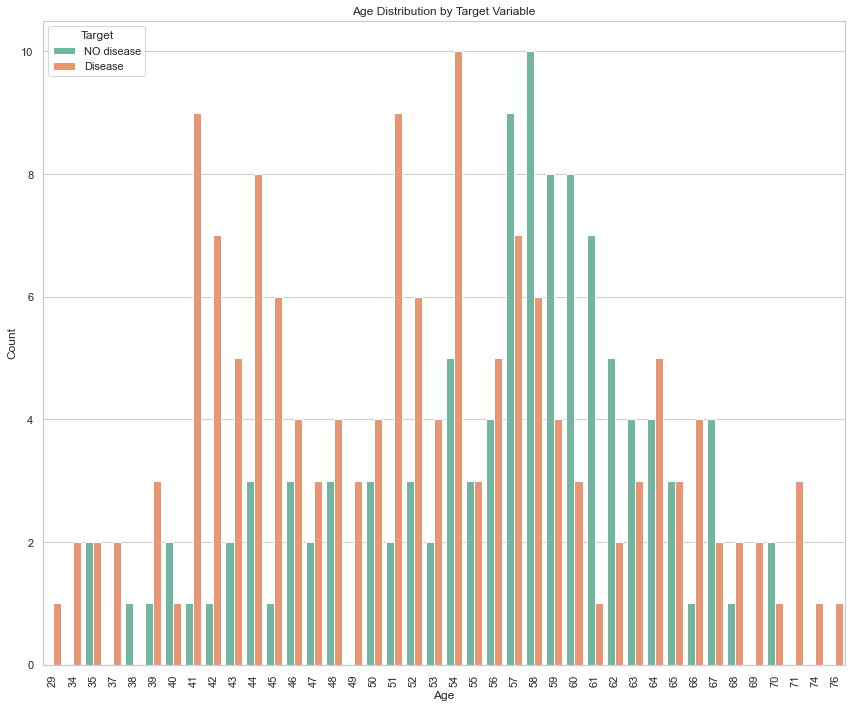

In [36]:
# Create a countplot to visualize the age distribution by the target variable
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")  # Set the style of the plot

# Replace 'target_variable' with the name of your target variable column
sns.countplot(data=heart, x='age', hue='target', palette='Set2')

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Target Variable')

# Show the legend (if you have a hue variable)
plt.legend(title='Target', labels=['NO disease', 'Disease'],loc='upper left')

# Adjust the appearance and layout of the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

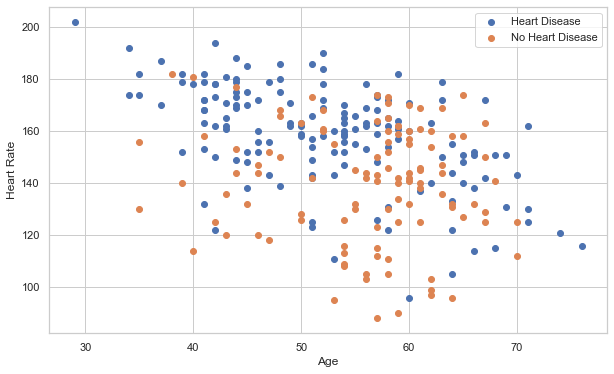

In [37]:
# age vs max heart rate
plt.figure(figsize=(10, 6))
plt.scatter(heart["age"][heart["target"] == 1],
           heart["thalach"][heart["target"]==1]);

plt.scatter(heart["age"][heart["target"] == 0],
           heart["thalach"][heart["target"]==0]);
plt.legend(["Heart Disease", "No Heart Disease"]);
plt.xlabel("Age")
plt.ylabel("Heart Rate");

Age follows normal distribution.As age increases from 29 the no of patients of heart attack also increases and reached its peak level at age 54 and it decreases when it comes to the age 76.Age groups 41-54 have high proportion of heart attacks.So we can say that adults are more prone to heart attack.

#### Sex Distribution according to Target variable

In [38]:
# compare target vs sex
pd.crosstab(heart["target"], heart["sex"])

sex,0,1
target,,
0,15,95
1,67,84


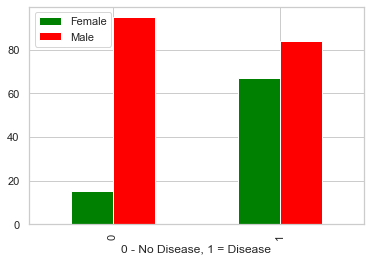

In [39]:
# crosstab plot
pd.crosstab(heart["target"], heart["sex"]).plot(kind="bar", color=["green", "red"]);
plt.xlabel("0 - No Disease, 1 = Disease")
plt.legend(["Female", "Male"])

heart attack is more for male than female.

#### Checking the distribution of Chest Pain with respect to Heart Disease

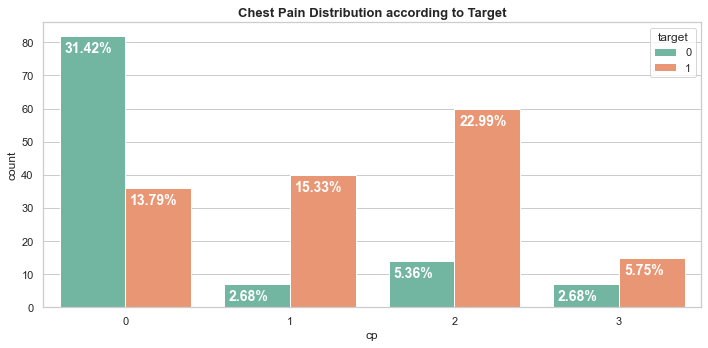

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='cp', hue='target', data=heart, palette='Set2')
ax.set_title("Chest Pain Distribution according to Target", fontsize = 13, weight = 'bold')
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

People with chest pain type 2 are more prone to heart attack when compared to other chest pain categories.

#### Resting Blood Pressure distribution according to target variable

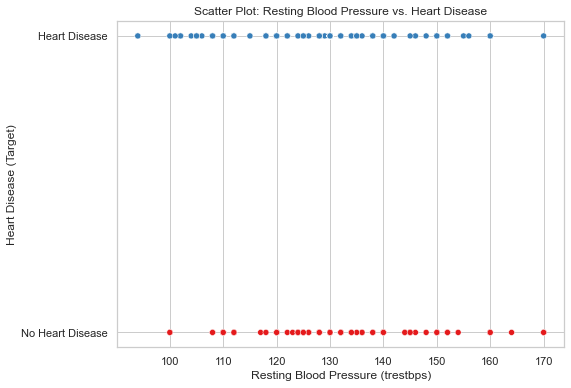

In [41]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='trestbps', y='target', data=heart, hue='target', palette='Set1', legend=False)
plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Heart Disease (Target)')
plt.title('Scatter Plot: Resting Blood Pressure vs. Heart Disease')
plt.yticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

It shows that resting blood pressure alone may not be a strong predictor of heart disease, as there is considerable overlap in the blood pressure values between individuals with and without heart disease.As blood pressure increase from 120 there is chance of heart attack.

#### Cholesterol level Vs Target Variable

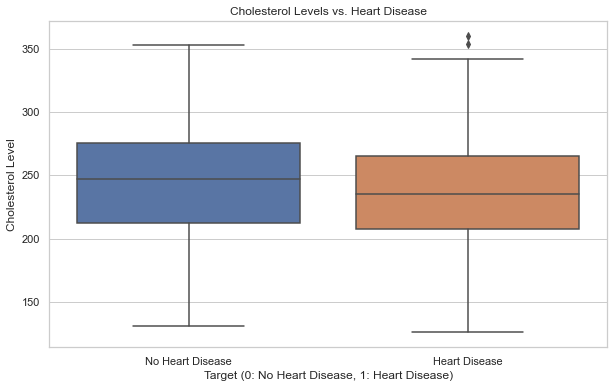

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot comparing cholesterol levels for target categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=heart)
plt.xlabel('Target (0: No Heart Disease, 1: Heart Disease)')
plt.ylabel('Cholesterol Level')
plt.title('Cholesterol Levels vs. Heart Disease')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()


 Some individuals with lower cholesterol levels also have heart disease, while some with higher cholesterol levels do not.

#### Fasting blood sugar distribution according to target variable

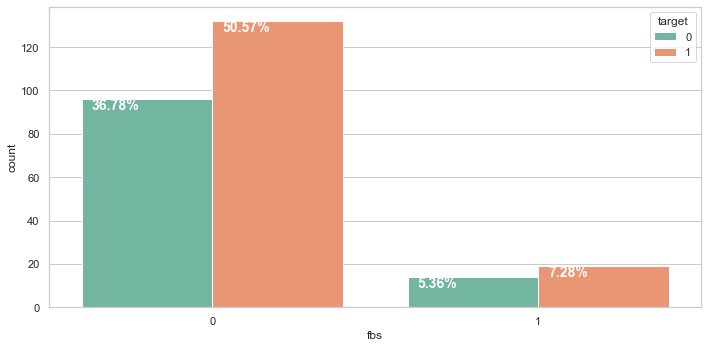

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='fbs', hue='target', data=heart, palette='Set2')
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

higher number of heart disease patient without diabetes. This provide an indication that fbs might not be a strong feature differentiating between heart disease an non-disease patient.

#### Slope distribution according to target variable

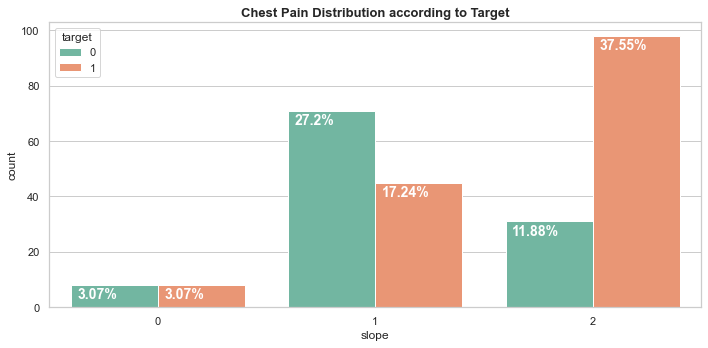

In [44]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='slope', hue='target', data=heart, palette='Set2')
ax.set_title("Chest Pain Distribution according to Target", fontsize = 13, weight = 'bold')
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

Downslopians are more prone to heart attack.

#### Restecg distribution according to Target variable

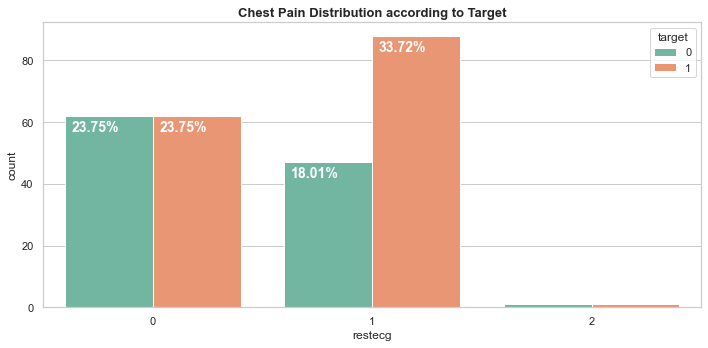

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.countplot(x='restecg', hue='target', data=heart, palette='Set2')
ax.set_title("Chest Pain Distribution according to Target", fontsize = 13, weight = 'bold')
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()

In [ ]:
Out of 261 people,179 are male and 82 are female.
People with typical agina chest pain are the most, whereas of count of people with asymtomatic chest pain is lowest.
People which non-normal heart beat are more in number and no of people with definite left ventricular hypertrophy is negligible in comparision to others.
Among 261 people 228 are non-diabetic and 33 are diabetic.
More number of people have thallium stress level 2 ie,reversable defect.
Most people has no exercise induced angina.
Most of the people are Downslopins which shows signs of unhealthy heart.
The no of major vessels is 0 for most of the people.

 People with RESTECG 1 are more pronne to heart attack follwed by RESTECG 0 and RESTECG 2

#### Heart Rate Vs Heart Attack

In [46]:
heart.groupby('target')['thalach'].describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
0,110.0,140.336364,22.223336,88.0,125.25,142.0,158.0,182.0
1,151.0,158.754967,19.481946,96.0,149.50,162.0,172.0,202.0


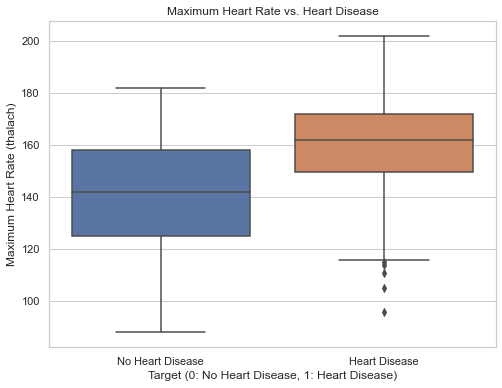

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='thalach', data=heart)
plt.xlabel('Target (0: No Heart Disease, 1: Heart Disease)')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.title('Maximum Heart Rate vs. Heart Disease')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

Individuals with heart disease tend to have higher maximum heart rates on average compared to those without heart disease.Increasing in heart rate will have high chances of heart attack

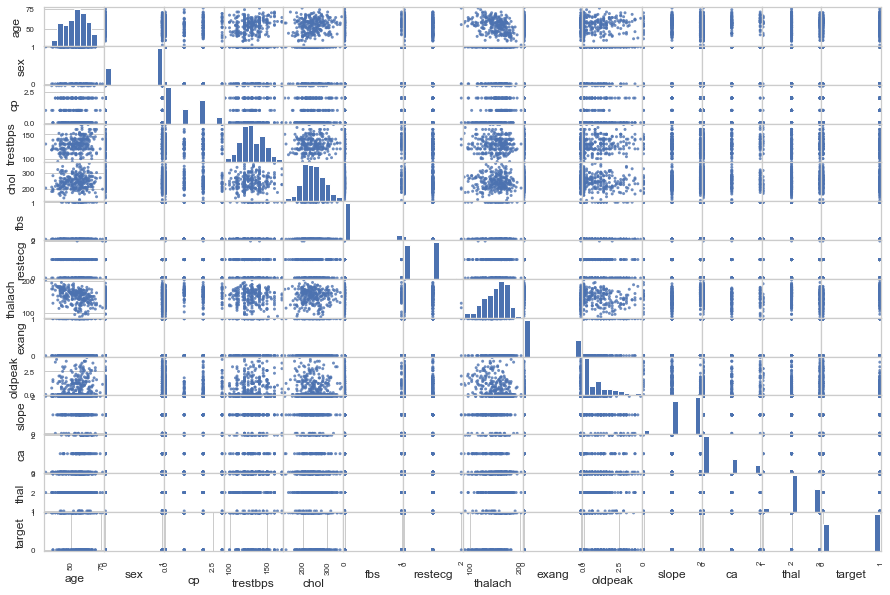

In [48]:
# Create a scatterplot matrix for all columns
from pandas.plotting import scatter_matrix
scatter_matrix(heart, figsize=(15, 10), alpha=0.8, diagonal='hist')
plt.show()

In [49]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.073351,-0.035241,0.278920,0.133812,0.129412,-0.093388,-0.402763,0.087981,0.196866,-0.142630,0.384780,0.065053,-0.200652
sex,-0.073351,1.000000,-0.095629,0.004428,-0.136354,0.058807,-0.085572,-0.057410,0.173593,0.169247,-0.061194,0.089277,0.250717,-0.326947
cp,-0.035241,-0.095629,1.000000,0.107239,-0.036392,0.144697,0.064762,0.275477,-0.374546,-0.121328,0.079260,-0.210705,-0.186138,0.404529
trestbps,0.278920,0.004428,0.107239,1.000000,0.095666,0.137721,-0.130787,-0.039151,-0.015670,0.155010,-0.059844,0.056375,-0.007052,-0.088727
chol,0.133812,-0.136354,-0.036392,0.095666,1.000000,-0.020748,-0.120110,0.004277,0.050308,-0.025590,0.055914,0.087311,0.078786,-0.081495
fbs,0.129412,0.058807,0.144697,0.137721,-0.020748,1.000000,-0.080167,-0.009086,-0.009135,0.024096,-0.081466,0.115061,-0.077256,-0.002147
restecg,-0.093388,-0.085572,0.064762,-0.130787,-0.120110,-0.080167,1.000000,0.066547,-0.091047,-0.089314,0.120631,-0.081091,0.057675,0.144633
thalach,-0.402763,-0.057410,0.275477,-0.039151,0.004277,-0.009086,0.066547,1.000000,-0.418355,-0.338750,0.372933,-0.247480,-0.139463,0.403880
exang,0.087981,0.173593,-0.374546,-0.015670,0.050308,-0.009135,-0.091047,-0.418355,1.000000,0.348314,-0.265311,0.185935,0.250552,-0.425255
oldpeak,0.196866,0.169247,-0.121328,0.155010,-0.025590,0.024096,-0.089314,-0.338750,0.348314,1.000000,-0.527422,0.277341,0.183205,-0.439291


<AxesSubplot:>

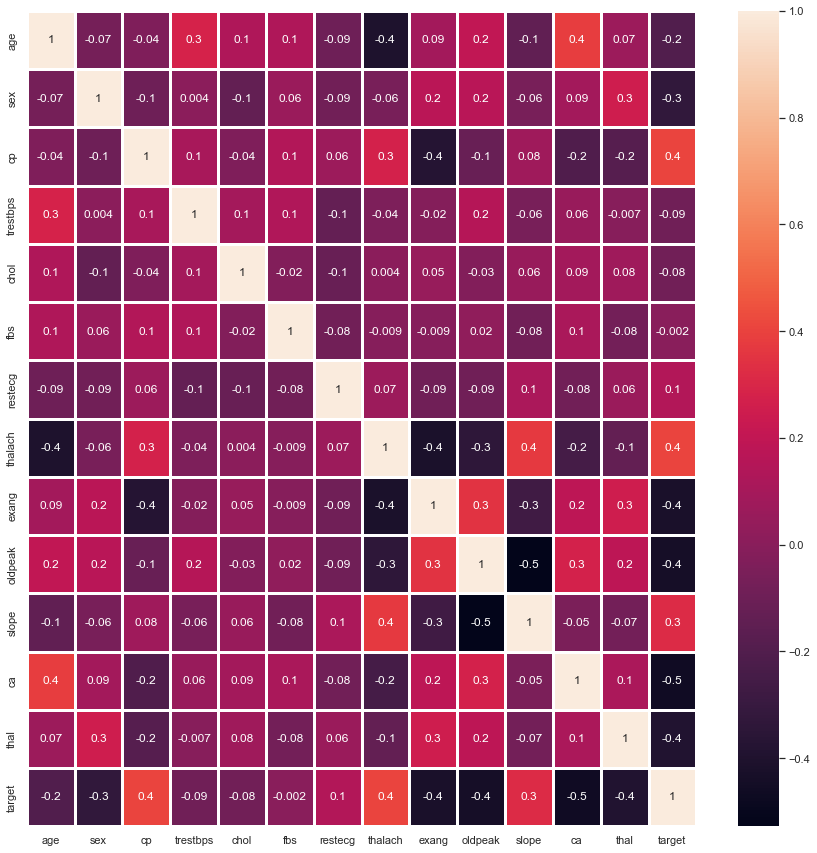

In [50]:
plt.figure(figsize = (15,15))
sns.heatmap(heart.corr(),annot = True,linewidths = 3,fmt = '.1g')

* ‘cp’, ‘thalach’, ‘slope’ shows good positive correlation with target
* ‘oldpeak’, ‘exang’, ‘ca’, ‘thal’, ‘sex’, ‘age’ shows a good negative correlation with target
* ‘fbs’ ‘chol’, ‘trestbps’, ‘restecg’ has low correlation with our target

## INFERENCE

* The average resting blood pressure of an individual is 129 whereas the maximun value goes upto 170.
* The maximum heart rate received varies from 88 to 202 and average heart rate is 150.
* Age of the group varies from 29 to 77 and the mean age is 53
* The highest cholestrol level is 360 and the lowest is 242.
* restecg can be 3 type.
* Resting Blood Pressure of individuals vary between 94 to 200.
* There are 4 types of chest pain.
* exercise induced angina has 2 types (1 = yes; 0 = no)
* ST depression values will be more for unhealthy people and it ranges from 0 to 4 and average stress level is 0.9
* slope can be of 3 types
* No of major vessels can be 0-3
* Thalium stress are of 3 types

* In the given data 151 people are suffering from heart attack and 110 has no heart attack out of 261 people.
* Male are more in no than female.Out of 261 people,179 are male and 82 are female
* Given dataset has people from age 29 to 74.
* Most of the people are suffering with typical anginal chest pain (cp=0).Most people have either normal or abnormal ST-T electrocardiographic wave.
* People with non-normal heart beat are more in number
* Most people have their fasting blood sugar lesser than 120mg/dl.Among 261 people 228 are non-diabetic and 33 are diabetic
* More number of people have thall stress level 2 and less for 1.
* No of people with exercise induced angina is less than people without exercise induced angina.Among 261 people 228 are non-diabetic and 33 are diabetic.
* More people have 0 major vessel.

* Age groups "40-49" & "50-59" have high proportion of heart attacks.
* Increasing in heart rate will have high chances of heart attack.
* People with RESTECG 1 are more pronne to heart attack follwed by RESTECG 0 and RESTECG 2.
* People with chest pain type 2 are more prone to heart attack when compared to other chest pain categories.

Those who do not exercise are more likely to have a heart attack.
People with 0 major vessels, that is with caa = 0 have high chance of heart attack
When the old peak is low, the probability of having a heart attack is higher.
People with a Cp=2 value have a high risk of heart attack.

With increasing in age the cholestrol level of the body is increasing.And if the body has high cholestrol level there is high chances of heart attack.
Increasing in heart rate will have high chances of heart attack:
A heart attack occurs when the flow of blood to the heart is blocked.

#### Age
There is highest negative correlation between "age" & "thalach". 
The severity of the correlation is -0.40. ie,there is an inverse relationship between the "age" and "thalach" variables.
Amount of heart rate decreases as age increases.

#### Trtbps
"trtbps" has highest correlation is the "age" variable. The correlation between them is 0.28
There is a positive low-intensity correlation.

#### Chol Variable
"chol" has highest correlation with "age" .
This is a low positive correlation(0.21).
So, we can say that as age increases, cholesterol also increases.

#### Thalach Variable
"Thalach" variable has highest correlation with "target" variable.
There is a 0.42 positive and moderate correlation between them.We can say that it can directly trigger a heart attack.
It means that the maximum heart rate reached maybe a situation triggered by other variables.


#### Oldpeak Variable
It has -0.58 correlation with "slope" variable.
There is a negative correlation between them.
The most significant correlation after the "slope" variable is with the "target" variable.

#### Sex Variable
There is no robust correlation between the variable "Sex" and other variables.
The highest figure is -0.28 with the target variable. There is a negative low-intensity correlation between them.


#### Cp Variable
Cp captures the high correlation with "thalach", "exang", and "target" variables.
The highest is again the "target" variable. There is a direct proportion between them.

#### Fbs Variable
The "Fbs" variable generally does not correlate with other variables.
The highest correlation with 0.18 belongs to the "trtbps" variable. There is a low positive correlation.
But we can say that when fasting blood sugar increases, resting blood pressure also increases.

#### Restecg Variable
There is no strong correlation between the "Rest_ecg" variable and other variables.
The highest correlation was 0.14 with the "target" variable. There is a positive low-intensity correlation.

#### Exang Variable
The variable has highest correlation with exercise-induced angina variable(-0.44).
Also, It seems to be associated with more than one variable except "target".

#### Slope Variable
"slope" variable has highest correlation with the old peak variable. There is an above-moderate correlation between them. It is the most significant relationship in the table with 0.58.
It has a moderate correlation with the variables "thalach" and "target".
The relationship with other variables is fragile

#### Ca Variable
"Ca" variable has the highest correlation with the target variable(-0.39).
Then comes the "age" variable with 0.28. We can say that there is a low positive correlation with the age variable.

#### Thal Variable
"Thal" has the highest correlation with the variable "target" with -0.36.
It has not had very high correlation coefficients with other variables.


#### Target Variable
The "target" variable correlates with more than one variable.
In general, we can say a relationship is below the middle level